In [50]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [51]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [22]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [23]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [24]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()




In [25]:
# Normalize the DataFrame
df_market_data_scaled = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(
    df_market_data_scaled,
    columns=df_market_data.columns
)

# Copy the crypto names from the original DataFrame
df_scaled["coin_id"] = df_market_data.index


# Set the coin_id column as index
df_scaled.set_index("coin_id", inplace=True)

# Display the scaled DataFrame
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [26]:
# Import KMeans from sklearn
from sklearn.cluster import KMeans

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Compute inertia for each k
for k in k_values:
    # Create a KMeans model
    model = KMeans(n_clusters=k, random_state=42, n_init=10)  # Ensure n_init is specified for sklearn 1.4+
    
    # Fit the model to the scaled data
    model.fit(df_market_data_scaled)
    
    # Append the inertia value to the list
    inertia.append(model.inertia_)

# Verify the lengths again
print(f"Length of k_values: {len(k_values)}")
print(f"Length of inertia: {len(inertia)}")

# Create a dictionary with the Elbow curve data
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame from the dictionary
df_elbow = pd.DataFrame(elbow_data)

# Display the first few rows of the DataFrame
df_elbow.head()

Length of k_values: 11
Length of inertia: 11


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [27]:
#Check the lengths of the k_values and inertia lists
print(f"Length of k_values: {len(k_values)}")
print(f"Length of inertia: {len(inertia)}")

# Recreate the dictionary and DataFrame if lengths are correct
if len(k_values) == len(inertia):
    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        "k": list(k_values),
        "inertia": inertia
    }

    # Create a DataFrame with the data to plot the Elbow curve
    df_elbow = pd.DataFrame(elbow_data)
    print(df_elbow.head())
else:
    print("Error: Lengths of k_values and inertia lists do not match!")

Length of k_values: 11
Length of inertia: 11
   k     inertia
0  1  287.000000
1  2  195.820218
2  3  123.190482
3  4   79.022435
4  5   65.302379


In [28]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": list(k_values),
    "inertia": inertia
}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


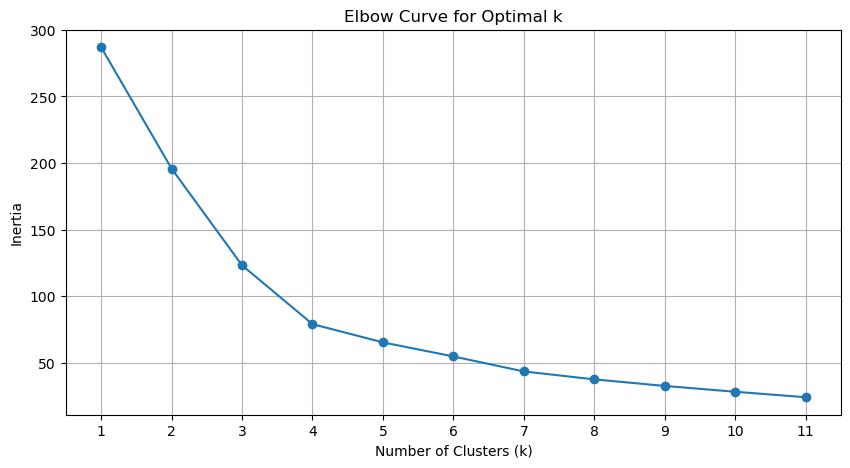

In [30]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve for Optimal k")
plt.xticks(df_elbow["k"])  # Ensure k values are marked
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [31]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=42, n_init=10)

In [32]:
# Fit the K-Means model using the scaled DataFrame
model.fit(df_market_data_scaled)
model.labels_

array([0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 1, 2, 2, 2, 2],
      dtype=int32)

In [34]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
predicted_clusters = model.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(predicted_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [42]:
# Create a copy of the scaled DataFrame
df_market_data_scaled=df_market_data_scaled.copy()

In [46]:
# Convert the scaled data back to a DataFrame
df_market_data_scaled = pd.DataFrame(
    df_market_data_scaled,  # Scaled data
    columns=df_market_data.columns,  # Use original column names
    index=df_market_data.index  # Use original index
)

# Add a new column with the predicted clusters
df_market_data_scaled["Market_Clusters"] = predicted_clusters

In [47]:
# Create a scatter plot using hvPlot by setting
scatter_plot = df_market_data_scaled.hvplot.scatter(
        x="price_change_percentage_24h",# `x="price_change_percentage_24h"`
        y="price_change_percentage_7d",# `y="price_change_percentage_7d"`.
        by="Market_Clusters",
        hover_cols=["Market_Clusters"] # add the crypto name in the `hover_cols` parameter to identify
    )


# Display the scatter plot
scatter_plot

# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.


:NdOverlay   [Market_Clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Market_Clusters)

---

### Optimize Clusters with Principal Component Analysis.

In [52]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [53]:
# Use the PCA model with `fit_transform` to reduce the original scaled DataFrame
market_data_scaled_pca = pca.fit_transform(df_market_data_scaled)
# down to three principal components.

# View the scaled PCA data
market_data_scaled_pca[:5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.32258066,  0.05449393,  1.11570854],
       [ 0.26633536, -0.53640937, -0.79694588],
       [ 0.25722513, -0.59201286, -0.6465287 ],
       [-2.95224985,  0.42237155,  1.26789353]])

In [54]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37005408, 0.32322221, 0.19115222])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8950

In [58]:
# Create a new DataFrame with the PCA data.
df_pca_data = pd.DataFrame(
    market_data_scaled_pca,
    columns=["PC1","PC2","PC3"]
)
# Copy the crypto names from the original scaled DataFrame
df_pca_data["coin_id"] = df_market_data_scaled.index

# Set the coin_id column as index
df_pca_data.set_index("coin_id", inplace=True)

# Display the scaled PCA DataFrame
df_pca_data.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [59]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [61]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i,random_state=1)
    k_model.fit(market_data_scaled_pca)
    inertia.append(k_model.inertia_)

In [62]:
# Create a dictionary with the data to plot the Elbow curve
elbow_pca_data = {"k": k, "inertia": inertia}
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_pca_data)

In [63]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    title="PCA Elbow Curve", 
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:Matches the original data of 4 

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [64]:
# Initialize the K-Means model using the best value for k
K_model_pca = KMeans(n_clusters=4,random_state=1)

In [65]:
# Fit the K-Means model using the PCA data
K_model_pca.fit(market_data_scaled_pca)

KMeans(n_clusters=4, random_state=1)

In [71]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
PCA_clusters = K_model_pca.predict(market_data_scaled_pca)

# Print the resulting array of cluster values.
print(PCA_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 3 1 0 0 2
 0 0 0 0]


In [73]:
# Convert PCA_clusters to a pandas Series
PCA_clusters_series = pd.Series(predicted_clusters, index=df_pca_data.index)

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_data["PCA_clusters"] = PCA_clusters_series

# Display the copy of the scaled PCA DataFrame
df_pca_data.head()

,PC1,PC2,PC3,PCA_clusters
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,0
ethereum,-1.322581,0.054494,1.115709,0
tether,0.266335,-0.536409,-0.796946,2
ripple,0.257225,-0.592013,-0.646529,2
bitcoin-cash,-2.952250,0.422372,1.267894,0


In [74]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
df_pca_data.hvplot.scatter(
    x = "PC1",
    y = "PC2",
    by = "PCA_clusters",
    hover_cols = 'coin_id',
    height = 500,
    width = 700
)

:NdOverlay   [PCA_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [76]:
# Composite plot to contrast the Elbow curves
elbow_curve = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve Original data", 
    xlabel="Number of Clusters (k)", 
    ylabel="Inertia",
    label="Elbow Curve",
    color="blue"  # Optional: differentiate visually by color
)

# Plot the PCA elbow curve for df_elbow_pca
pca_elbow_curve = df_elbow_pca.hvplot.line(
    x="k", 
    y="inertia", 
    label="PCA Elbow Curve",
    color="green"  # Optional: differentiate visually by color
)

# Combine the plots into a composite plot
composite_plot = elbow_curve + pca_elbow_curve

# Display the composite plot
composite_plot
# YOUR CODE HERE!

:Layout
   .Curve.Elbow_Curve     :Curve   [k]   (inertia)
   .Curve.PCA_Elbow_Curve :Curve   [k]   (inertia)

In [78]:
# Composite plot to contrast the clusters
# Scatter plot for the original market data clusters
scatter_original = df_market_data_scaled.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="Market_Clusters",
    hover_cols=['coin_id'],
    height=500,
    width=700,
    label="Original Clusters"
)

# Scatter plot for the PCA-based clusters
scatter_pca = df_pca_data.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PCA_clusters",
    hover_cols=['coin_id'],
    height=500,
    width=700,
    label="PCA Clusters"
)

# Display the composite plot
composite_plot

:Layout
   .Curve.Elbow_Curve     :Curve   [k]   (inertia)
   .Curve.PCA_Elbow_Curve :Curve   [k]   (inertia)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer: